## Task 1


In [1]:
import os
import pandas as pd
from utils import *
from plotter import *
%load_ext autoreload
%autoreload 2

In [5]:
DATA_PATH = '../../data/'
plt.rcParams['figure.dpi'] = 100

### Load Data

In [6]:
A = np.loadtxt(DATA_PATH + "linear_function_data.txt")
B = np.loadtxt(DATA_PATH + "nonlinear_function_data.txt")
X_a = A[:, 0]
F_a = A[:, 1]
X_b = B[:, 0]
F_b = B[:, 1]

### Part 1: Approximating Dataset (A) by a Linear Function
From the sheet we can use that
$$
\begin{aligned}
    (X^T X) \hat{A}^T = X^T F
\end{aligned}
$$
In our case $X^T X$ and $X^T F$ are scalars, hence $\hat{A}^T =: a$ is too.

In [687]:
slope_a = utils.linear_basis_lst_sqr_approx(X_a, F_a)
print("Slope = ", slope_a)

Slope =  0.7500002401387145


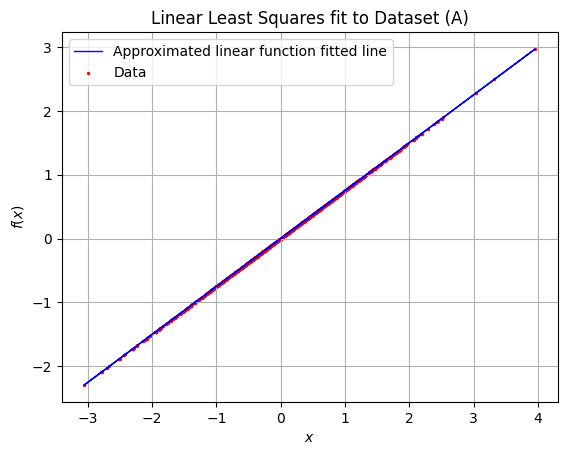

In [688]:
plt.title("Linear Least Squares fit to Dataset (A)")
plt.plot(X_a, slope_a * X_a, linewidth=1, color='blue', label="Approximated linear function fitted line")
plotter.basic_data_plot(X_a, F_a)

### Part 2: Approximating Dataset (B) by a Linear Function

In [689]:
slope_b = utils.linear_basis_lst_sqr_approx(X_b, F_b)
print("Slope = ", slope_b)

Slope =  0.033210360778119924


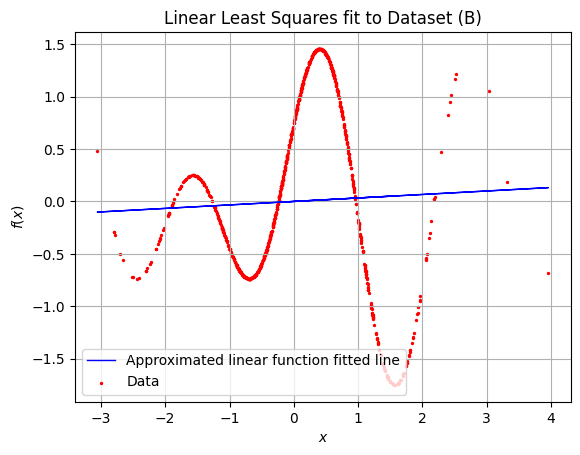

In [690]:
plt.title("Linear Least Squares fit to Dataset (B)")
plt.plot(X_b, slope_b * X_b, linewidth=1, color='blue',label="Approximated linear function fitted line")
plotter.basic_data_plot(X_b, F_b)

### Part 3: Approximating Dataset (B) by a Combination of Radial Functions

we estimate that a good approximation can be achieved by a grid with $L = 16$ at a separation of about $1/2$ with an $\epsilon = 0.5$ as this allows the peaks to be well localized while preserving a reasonable smoothness (no excessive overlap with next nearest neighbor peaks)

In [691]:
EPSILON = 0.5
L = 16
GRID_b = np.linspace(X_b.min(), X_b.max(), L)
R_COND = 1e-2

In [692]:
coefficients = utils.radial_basis_lst_sqr_approx(X_b, F_b, GRID_b, EPSILON, R_COND)
coefficients

array([-0.20979409, -0.41947349, -0.26182823,  0.25024088,  0.13726521,
       -0.7940476 , -0.13490987,  1.01565349,  0.88086545, -0.52542151,
       -1.64241175,  0.0748271 ,  0.78691149,  0.29704133,  0.0853937 ,
        0.01962219])

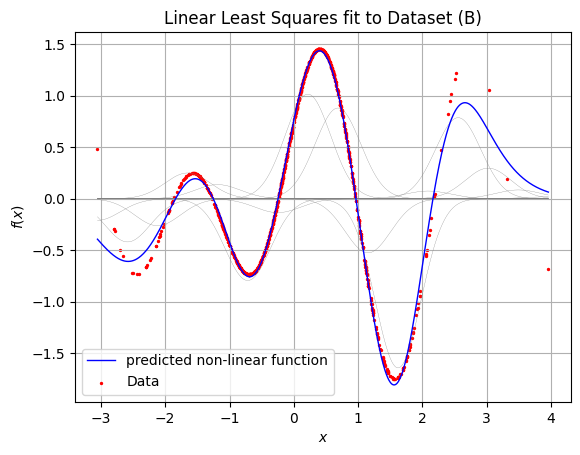

In [693]:
X_plot = np.linspace(X_b.min(), X_b.max(), 1000)
phi_plot = utils.radial_basis(X_plot, GRID_b, epsilon=EPSILON)

# plot contribution from individual basis vectors
for i, c in enumerate(coefficients):
    c_i = np.zeros(L)
    c_i[i] = c
    plt.plot(X_plot, phi_plot @ c_i.T, linewidth=0.2, color="grey")

plt.title("Linear Least Squares fit to Dataset (B)")
plt.plot(X_plot, phi_plot @ coefficients.T, linewidth=1, color='blue', label="predicted non-linear function")
plotter.basic_data_plot(X_b, F_b)

In [694]:
N = 1000
print("Total MSE", utils.compute_mse(F_b, utils.radial_basis(X_b, GRID_b, EPSILON) @ coefficients.T))

Total MSE 0.002991725720364332
